# LSS applied to backbone generation of WLALL pentapeptide

## Load the different components from their respective repos

In [1]:
from mdn_propagator.propagator import Propagator
from molgen.models import DDPM
from snrv import Snrv

### Other dependencies

In [2]:
import mdtraj as md
from pathlib import Path
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load and prep data

In [3]:
trj_fnames = sorted([str(i) for i in Path('data_mdshare/').glob('pentapeptide-*-500ns-impl-solv.xtc')])
top_fname = 'data_mdshare/pentapeptide-impl-solv.pdb'

In [4]:
trjs = [md.load(t, top=top_fname).center_coordinates() for t in trj_fnames]
trjs

[<mdtraj.Trajectory with 5001 frames, 94 atoms, 5 residues, and unitcells at 0x7f8520511070>,
 <mdtraj.Trajectory with 5001 frames, 94 atoms, 5 residues, and unitcells at 0x7f85204abd90>,
 <mdtraj.Trajectory with 5001 frames, 94 atoms, 5 residues, and unitcells at 0x7f8520479dc0>,
 <mdtraj.Trajectory with 5001 frames, 94 atoms, 5 residues, and unitcells at 0x7f8520525d00>,
 <mdtraj.Trajectory with 5001 frames, 94 atoms, 5 residues, and unitcells at 0x7f8520479c40>,
 <mdtraj.Trajectory with 5001 frames, 94 atoms, 5 residues, and unitcells at 0x7f8520525a90>,
 <mdtraj.Trajectory with 5001 frames, 94 atoms, 5 residues, and unitcells at 0x7f852052daf0>,
 <mdtraj.Trajectory with 5001 frames, 94 atoms, 5 residues, and unitcells at 0x7f85204d6f40>,
 <mdtraj.Trajectory with 5001 frames, 94 atoms, 5 residues, and unitcells at 0x7f85204c6a30>,
 <mdtraj.Trajectory with 5001 frames, 94 atoms, 5 residues, and unitcells at 0x7f85204b9e80>,
 <mdtraj.Trajectory with 5001 frames, 94 atoms, 5 residues, 

In [5]:
coords_torch = list()
for trj in trjs:
    t_backbone = trj.atom_slice(trj.top.select('name == CA')).center_coordinates()
    pdists = [torch.pdist(p)[None] for p in torch.tensor(t_backbone.xyz)]
    #pdists = [torch.pdist(p)[None] for p in torch.tensor(trj.xyz)]
    coords_torch.append(torch.cat(pdists))
len(coords_torch), coords_torch[0].shape

(25, torch.Size([5001, 10]))

In [6]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# SRV fitting

In [7]:
from snrv.utils import set_random_seed

In [8]:
set_random_seed(42)

Setting random seed to 42


In [9]:
input_size = coords_torch[0].size()[1]
output_size = 3
hidden_depth = 2
hidden_size = 100
batch_norm = True
dropout_rate = 0.0
lr = 1E-2
weight_decay = 0.0
val_frac = 0.05
n_epochs = 300
batch_size = 25000
VAMPdegree = 2
is_reversible = True
num_workers = 0

model_snrv = Snrv(input_size, output_size, hidden_depth=hidden_depth, hidden_size=hidden_size,
            batch_norm=batch_norm, dropout_rate=dropout_rate, lr=lr, weight_decay=weight_decay, 
            val_frac=val_frac, n_epochs=n_epochs, batch_size=batch_size, 
            VAMPdegree=VAMPdegree,is_reversible=is_reversible, num_workers=num_workers,
            activation=torch.nn.GELU(), device=device)
model_snrv = model_snrv.to(device)

In [10]:
lag_n = 5

In [11]:
model_snrv.fit(coords_torch, lag=lag_n, scheduler=0.98)

Epoch 0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.37batch/s]


[Epoch 0]	 training loss = -1.171	 validation loss = -1.546


Epoch 1: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.79batch/s]


[Epoch 1]	 training loss = -1.719	 validation loss = -1.513


Epoch 2: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.57batch/s]


[Epoch 2]	 training loss = -1.910	 validation loss = -1.704


Epoch 3: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.79batch/s]


[Epoch 3]	 training loss = -2.008	 validation loss = -1.598


Epoch 4: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 4]	 training loss = -2.040	 validation loss = -1.837


Epoch 5: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 5]	 training loss = -2.064	 validation loss = -1.977


Epoch 6: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 6]	 training loss = -2.077	 validation loss = -1.973


Epoch 7: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.74batch/s]


[Epoch 7]	 training loss = -2.091	 validation loss = -1.990


Epoch 8: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.80batch/s]


[Epoch 8]	 training loss = -2.101	 validation loss = -2.019


Epoch 9: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 9]	 training loss = -2.112	 validation loss = -2.022


Epoch 10: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 10]	 training loss = -2.119	 validation loss = -2.045


Epoch 11: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.77batch/s]


[Epoch 11]	 training loss = -2.128	 validation loss = -2.070


Epoch 12: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.80batch/s]


[Epoch 12]	 training loss = -2.134	 validation loss = -2.075


Epoch 13: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.79batch/s]


[Epoch 13]	 training loss = -2.145	 validation loss = -1.907


Epoch 14: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.78batch/s]


[Epoch 14]	 training loss = -2.152	 validation loss = -1.866


Epoch 15: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 15]	 training loss = -2.160	 validation loss = -1.975


Epoch 16: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 16]	 training loss = -2.163	 validation loss = -1.991


Epoch 17: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 17]	 training loss = -2.169	 validation loss = -1.909


Epoch 18: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 18]	 training loss = -2.177	 validation loss = -1.929


Epoch 19: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.79batch/s]


[Epoch 19]	 training loss = -2.177	 validation loss = -2.091


Epoch 20: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 20]	 training loss = -2.176	 validation loss = -1.990


Epoch 21: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.62batch/s]


[Epoch 21]	 training loss = -2.179	 validation loss = -1.852


Epoch 22: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.79batch/s]


[Epoch 22]	 training loss = -2.184	 validation loss = -2.110


Epoch 23: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 23]	 training loss = -2.192	 validation loss = -2.064


Epoch 24: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 24]	 training loss = -2.194	 validation loss = -2.083


Epoch 25: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.91batch/s]


[Epoch 25]	 training loss = -2.198	 validation loss = -1.944


Epoch 26: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 26]	 training loss = -2.199	 validation loss = -2.066


Epoch 27: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.89batch/s]


[Epoch 27]	 training loss = -2.199	 validation loss = -2.148


Epoch 28: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.79batch/s]


[Epoch 28]	 training loss = -2.202	 validation loss = -2.115


Epoch 29: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 29]	 training loss = -2.205	 validation loss = -2.152


Epoch 30: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.60batch/s]


[Epoch 30]	 training loss = -2.204	 validation loss = -2.122


Epoch 31: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.76batch/s]


[Epoch 31]	 training loss = -2.207	 validation loss = -2.105


Epoch 32: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 32]	 training loss = -2.210	 validation loss = -2.123


Epoch 33: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.75batch/s]


[Epoch 33]	 training loss = -2.211	 validation loss = -2.140


Epoch 34: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.78batch/s]


[Epoch 34]	 training loss = -2.214	 validation loss = -2.162


Epoch 35: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 35]	 training loss = -2.218	 validation loss = -2.196


Epoch 36: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.90batch/s]


[Epoch 36]	 training loss = -2.218	 validation loss = -2.196


Epoch 37: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 37]	 training loss = -2.218	 validation loss = -2.079


Epoch 38: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 38]	 training loss = -2.223	 validation loss = -2.159


Epoch 39: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.64batch/s]


[Epoch 39]	 training loss = -2.225	 validation loss = -2.198


Epoch 40: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.80batch/s]


[Epoch 40]	 training loss = -2.223	 validation loss = -2.135


Epoch 41: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 41]	 training loss = -2.226	 validation loss = -2.215


Epoch 42: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 42]	 training loss = -2.230	 validation loss = -2.188


Epoch 43: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.92batch/s]


[Epoch 43]	 training loss = -2.231	 validation loss = -2.165


Epoch 44: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 44]	 training loss = -2.231	 validation loss = -2.176


Epoch 45: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.90batch/s]


[Epoch 45]	 training loss = -2.236	 validation loss = -2.220


Epoch 46: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.80batch/s]


[Epoch 46]	 training loss = -2.239	 validation loss = -2.231


Epoch 47: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 47]	 training loss = -2.242	 validation loss = -2.223


Epoch 48: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.62batch/s]


[Epoch 48]	 training loss = -2.239	 validation loss = -2.199


Epoch 49: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 49]	 training loss = -2.240	 validation loss = -2.200


Epoch 50: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 50]	 training loss = -2.245	 validation loss = -2.217


Epoch 51: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 51]	 training loss = -2.248	 validation loss = -2.199


Epoch 52: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.89batch/s]


[Epoch 52]	 training loss = -2.249	 validation loss = -2.223


Epoch 53: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 53]	 training loss = -2.249	 validation loss = -2.227


Epoch 54: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 54]	 training loss = -2.253	 validation loss = -2.239


Epoch 55: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 55]	 training loss = -2.252	 validation loss = -2.210


Epoch 56: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 56]	 training loss = -2.253	 validation loss = -2.166


Epoch 57: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.55batch/s]


[Epoch 57]	 training loss = -2.257	 validation loss = -2.229


Epoch 58: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.78batch/s]


[Epoch 58]	 training loss = -2.259	 validation loss = -2.156


Epoch 59: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 59]	 training loss = -2.261	 validation loss = -2.136


Epoch 60: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.79batch/s]


[Epoch 60]	 training loss = -2.263	 validation loss = -2.236


Epoch 61: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.90batch/s]


[Epoch 61]	 training loss = -2.267	 validation loss = -2.238


Epoch 62: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 62]	 training loss = -2.265	 validation loss = -2.275


Epoch 63: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.91batch/s]


[Epoch 63]	 training loss = -2.270	 validation loss = -2.278


Epoch 64: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 64]	 training loss = -2.270	 validation loss = -2.198


Epoch 65: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 65]	 training loss = -2.273	 validation loss = -2.116


Epoch 66: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.62batch/s]


[Epoch 66]	 training loss = -2.272	 validation loss = -2.255


Epoch 67: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 67]	 training loss = -2.275	 validation loss = -2.242


Epoch 68: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 68]	 training loss = -2.276	 validation loss = -2.290


Epoch 69: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 69]	 training loss = -2.282	 validation loss = -2.244


Epoch 70: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.92batch/s]


[Epoch 70]	 training loss = -2.283	 validation loss = -2.239


Epoch 71: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 71]	 training loss = -2.283	 validation loss = -2.290


Epoch 72: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.93batch/s]


[Epoch 72]	 training loss = -2.284	 validation loss = -2.199


Epoch 73: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.79batch/s]


[Epoch 73]	 training loss = -2.283	 validation loss = -2.285


Epoch 74: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 74]	 training loss = -2.281	 validation loss = -2.297


Epoch 75: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.64batch/s]


[Epoch 75]	 training loss = -2.286	 validation loss = -2.132


Epoch 76: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 76]	 training loss = -2.285	 validation loss = -2.155


Epoch 77: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 77]	 training loss = -2.282	 validation loss = -2.162


Epoch 78: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.74batch/s]


[Epoch 78]	 training loss = -2.286	 validation loss = -2.274


Epoch 79: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.91batch/s]


[Epoch 79]	 training loss = -2.284	 validation loss = -2.288


Epoch 80: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 80]	 training loss = -2.293	 validation loss = -2.283


Epoch 81: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.90batch/s]


[Epoch 81]	 training loss = -2.294	 validation loss = -2.315


Epoch 82: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.80batch/s]


[Epoch 82]	 training loss = -2.297	 validation loss = -2.328


Epoch 83: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 83]	 training loss = -2.297	 validation loss = -2.304


Epoch 84: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.64batch/s]


[Epoch 84]	 training loss = -2.296	 validation loss = -2.325


Epoch 85: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 85]	 training loss = -2.298	 validation loss = -2.323


Epoch 86: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.80batch/s]


[Epoch 86]	 training loss = -2.297	 validation loss = -2.329


Epoch 87: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 87]	 training loss = -2.300	 validation loss = -2.314


Epoch 88: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.91batch/s]


[Epoch 88]	 training loss = -2.297	 validation loss = -2.284


Epoch 89: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 89]	 training loss = -2.298	 validation loss = -2.176


Epoch 90: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.93batch/s]


[Epoch 90]	 training loss = -2.300	 validation loss = -2.277


Epoch 91: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 91]	 training loss = -2.300	 validation loss = -2.307


Epoch 92: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 92]	 training loss = -2.300	 validation loss = -2.349


Epoch 93: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.65batch/s]


[Epoch 93]	 training loss = -2.303	 validation loss = -2.351


Epoch 94: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 94]	 training loss = -2.308	 validation loss = -2.244


Epoch 95: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 95]	 training loss = -2.306	 validation loss = -2.344


Epoch 96: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 96]	 training loss = -2.306	 validation loss = -2.354


Epoch 97: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.91batch/s]


[Epoch 97]	 training loss = -2.303	 validation loss = -2.320


Epoch 98: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 98]	 training loss = -2.304	 validation loss = -2.353


Epoch 99: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.90batch/s]


[Epoch 99]	 training loss = -2.307	 validation loss = -2.277


Epoch 100: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 100]	 training loss = -2.305	 validation loss = -2.262


Epoch 101: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 101]	 training loss = -2.309	 validation loss = -2.237


Epoch 102: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.65batch/s]


[Epoch 102]	 training loss = -2.308	 validation loss = -2.351


Epoch 103: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 103]	 training loss = -2.311	 validation loss = -2.339


Epoch 104: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.89batch/s]


[Epoch 104]	 training loss = -2.312	 validation loss = -2.366


Epoch 105: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 105]	 training loss = -2.310	 validation loss = -2.277


Epoch 106: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.92batch/s]


[Epoch 106]	 training loss = -2.313	 validation loss = -2.099


Epoch 107: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 107]	 training loss = -2.308	 validation loss = -2.354


Epoch 108: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.93batch/s]


[Epoch 108]	 training loss = -2.312	 validation loss = -2.351


Epoch 109: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 109]	 training loss = -2.318	 validation loss = -2.330


Epoch 110: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 110]	 training loss = -2.315	 validation loss = -2.297


Epoch 111: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.66batch/s]


[Epoch 111]	 training loss = -2.312	 validation loss = -2.362


Epoch 112: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 112]	 training loss = -2.313	 validation loss = -2.341


Epoch 113: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 113]	 training loss = -2.316	 validation loss = -2.359


Epoch 114: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 114]	 training loss = -2.316	 validation loss = -2.293


Epoch 115: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.94batch/s]


[Epoch 115]	 training loss = -2.315	 validation loss = -2.353


Epoch 116: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 116]	 training loss = -2.317	 validation loss = -2.332


Epoch 117: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 117]	 training loss = -2.313	 validation loss = -2.336


Epoch 118: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 118]	 training loss = -2.315	 validation loss = -2.331


Epoch 119: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.89batch/s]


[Epoch 119]	 training loss = -2.314	 validation loss = -2.341


Epoch 120: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.65batch/s]


[Epoch 120]	 training loss = -2.316	 validation loss = -2.289


Epoch 121: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.79batch/s]


[Epoch 121]	 training loss = -2.319	 validation loss = -2.334


Epoch 122: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 122]	 training loss = -2.319	 validation loss = -2.347


Epoch 123: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.72batch/s]


[Epoch 123]	 training loss = -2.318	 validation loss = -2.371


Epoch 124: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.92batch/s]


[Epoch 124]	 training loss = -2.320	 validation loss = -2.352


Epoch 125: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 125]	 training loss = -2.319	 validation loss = -2.354


Epoch 126: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 126]	 training loss = -2.318	 validation loss = -2.368


Epoch 127: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 127]	 training loss = -2.321	 validation loss = -2.368


Epoch 128: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.89batch/s]


[Epoch 128]	 training loss = -2.320	 validation loss = -2.375


Epoch 129: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.63batch/s]


[Epoch 129]	 training loss = -2.321	 validation loss = -2.372


Epoch 130: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 130]	 training loss = -2.323	 validation loss = -2.368


Epoch 131: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 131]	 training loss = -2.323	 validation loss = -2.381


Epoch 132: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 132]	 training loss = -2.322	 validation loss = -2.373


Epoch 133: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.91batch/s]


[Epoch 133]	 training loss = -2.322	 validation loss = -2.359


Epoch 134: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 134]	 training loss = -2.322	 validation loss = -2.359


Epoch 135: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.94batch/s]


[Epoch 135]	 training loss = -2.323	 validation loss = -2.378


Epoch 136: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 136]	 training loss = -2.322	 validation loss = -2.376


Epoch 137: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 137]	 training loss = -2.323	 validation loss = -2.383


Epoch 138: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.61batch/s]


[Epoch 138]	 training loss = -2.325	 validation loss = -2.380


Epoch 139: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.79batch/s]


[Epoch 139]	 training loss = -2.325	 validation loss = -2.386


Epoch 140: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 140]	 training loss = -2.325	 validation loss = -2.385


Epoch 141: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 141]	 training loss = -2.326	 validation loss = -2.381


Epoch 142: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.95batch/s]


[Epoch 142]	 training loss = -2.323	 validation loss = -2.367


Epoch 143: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 143]	 training loss = -2.328	 validation loss = -2.385


Epoch 144: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.95batch/s]


[Epoch 144]	 training loss = -2.328	 validation loss = -2.378


Epoch 145: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.80batch/s]


[Epoch 145]	 training loss = -2.327	 validation loss = -2.376


Epoch 146: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.91batch/s]


[Epoch 146]	 training loss = -2.327	 validation loss = -2.376


Epoch 147: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.66batch/s]


[Epoch 147]	 training loss = -2.324	 validation loss = -2.378


Epoch 148: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 148]	 training loss = -2.328	 validation loss = -2.378


Epoch 149: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.90batch/s]


[Epoch 149]	 training loss = -2.327	 validation loss = -2.387


Epoch 150: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 150]	 training loss = -2.327	 validation loss = -2.373


Epoch 151: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.92batch/s]


[Epoch 151]	 training loss = -2.327	 validation loss = -2.370


Epoch 152: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 152]	 training loss = -2.327	 validation loss = -2.391


Epoch 153: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.92batch/s]


[Epoch 153]	 training loss = -2.326	 validation loss = -2.381


Epoch 154: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.80batch/s]


[Epoch 154]	 training loss = -2.327	 validation loss = -2.391


Epoch 155: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 155]	 training loss = -2.330	 validation loss = -2.384


Epoch 156: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.64batch/s]


[Epoch 156]	 training loss = -2.327	 validation loss = -2.384


Epoch 157: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 157]	 training loss = -2.329	 validation loss = -2.384


Epoch 158: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 158]	 training loss = -2.328	 validation loss = -2.389


Epoch 159: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 159]	 training loss = -2.327	 validation loss = -2.384


Epoch 160: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 160]	 training loss = -2.328	 validation loss = -2.389


Epoch 161: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.80batch/s]


[Epoch 161]	 training loss = -2.330	 validation loss = -2.388


Epoch 162: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.92batch/s]


[Epoch 162]	 training loss = -2.327	 validation loss = -2.384


Epoch 163: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 163]	 training loss = -2.327	 validation loss = -2.382


Epoch 164: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 164]	 training loss = -2.328	 validation loss = -2.393


Epoch 165: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.66batch/s]


[Epoch 165]	 training loss = -2.330	 validation loss = -2.385


Epoch 166: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 166]	 training loss = -2.331	 validation loss = -2.386


Epoch 167: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 167]	 training loss = -2.333	 validation loss = -2.388


Epoch 168: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 168]	 training loss = -2.327	 validation loss = -2.387


Epoch 169: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.93batch/s]


[Epoch 169]	 training loss = -2.331	 validation loss = -2.390


Epoch 170: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 170]	 training loss = -2.334	 validation loss = -2.389


Epoch 171: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.93batch/s]


[Epoch 171]	 training loss = -2.333	 validation loss = -2.394


Epoch 172: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 172]	 training loss = -2.329	 validation loss = -2.390


Epoch 173: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 173]	 training loss = -2.330	 validation loss = -2.391


Epoch 174: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.64batch/s]


[Epoch 174]	 training loss = -2.331	 validation loss = -2.394


Epoch 175: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 175]	 training loss = -2.332	 validation loss = -2.392


Epoch 176: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.90batch/s]


[Epoch 176]	 training loss = -2.329	 validation loss = -2.390


Epoch 177: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.89batch/s]


[Epoch 177]	 training loss = -2.332	 validation loss = -2.392


Epoch 178: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.91batch/s]


[Epoch 178]	 training loss = -2.333	 validation loss = -2.392


Epoch 179: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 179]	 training loss = -2.334	 validation loss = -2.389


Epoch 180: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.92batch/s]


[Epoch 180]	 training loss = -2.332	 validation loss = -2.390


Epoch 181: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 181]	 training loss = -2.330	 validation loss = -2.391


Epoch 182: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 182]	 training loss = -2.331	 validation loss = -2.392


Epoch 183: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.60batch/s]


[Epoch 183]	 training loss = -2.334	 validation loss = -2.393


Epoch 184: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 184]	 training loss = -2.329	 validation loss = -2.393


Epoch 185: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 185]	 training loss = -2.332	 validation loss = -2.392


Epoch 186: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 186]	 training loss = -2.333	 validation loss = -2.395


Epoch 187: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.94batch/s]


[Epoch 187]	 training loss = -2.332	 validation loss = -2.389


Epoch 188: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 188]	 training loss = -2.334	 validation loss = -2.392


Epoch 189: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.92batch/s]


[Epoch 189]	 training loss = -2.333	 validation loss = -2.393


Epoch 190: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 190]	 training loss = -2.331	 validation loss = -2.394


Epoch 191: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.89batch/s]


[Epoch 191]	 training loss = -2.334	 validation loss = -2.391


Epoch 192: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.64batch/s]


[Epoch 192]	 training loss = -2.332	 validation loss = -2.392


Epoch 193: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 193]	 training loss = -2.332	 validation loss = -2.394


Epoch 194: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 194]	 training loss = -2.333	 validation loss = -2.395


Epoch 195: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 195]	 training loss = -2.333	 validation loss = -2.395


Epoch 196: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.94batch/s]


[Epoch 196]	 training loss = -2.335	 validation loss = -2.394


Epoch 197: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 197]	 training loss = -2.333	 validation loss = -2.396


Epoch 198: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.91batch/s]


[Epoch 198]	 training loss = -2.333	 validation loss = -2.395


Epoch 199: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 199]	 training loss = -2.334	 validation loss = -2.396


Epoch 200: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 200]	 training loss = -2.334	 validation loss = -2.394


Epoch 201: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.65batch/s]


[Epoch 201]	 training loss = -2.332	 validation loss = -2.390


Epoch 202: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 202]	 training loss = -2.335	 validation loss = -2.395


Epoch 203: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 203]	 training loss = -2.336	 validation loss = -2.395


Epoch 204: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 204]	 training loss = -2.333	 validation loss = -2.394


Epoch 205: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.90batch/s]


[Epoch 205]	 training loss = -2.337	 validation loss = -2.395


Epoch 206: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 206]	 training loss = -2.331	 validation loss = -2.398


Epoch 207: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.93batch/s]


[Epoch 207]	 training loss = -2.335	 validation loss = -2.396


Epoch 208: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 208]	 training loss = -2.334	 validation loss = -2.395


Epoch 209: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 209]	 training loss = -2.331	 validation loss = -2.396


Epoch 210: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.65batch/s]


[Epoch 210]	 training loss = -2.333	 validation loss = -2.396


Epoch 211: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 211]	 training loss = -2.336	 validation loss = -2.398


Epoch 212: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 212]	 training loss = -2.334	 validation loss = -2.396


Epoch 213: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 213]	 training loss = -2.335	 validation loss = -2.394


Epoch 214: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.93batch/s]


[Epoch 214]	 training loss = -2.335	 validation loss = -2.395


Epoch 215: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 215]	 training loss = -2.333	 validation loss = -2.398


Epoch 216: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.94batch/s]


[Epoch 216]	 training loss = -2.335	 validation loss = -2.396


Epoch 217: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 217]	 training loss = -2.335	 validation loss = -2.395


Epoch 218: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.90batch/s]


[Epoch 218]	 training loss = -2.337	 validation loss = -2.396


Epoch 219: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.66batch/s]


[Epoch 219]	 training loss = -2.337	 validation loss = -2.397


Epoch 220: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 220]	 training loss = -2.334	 validation loss = -2.396


Epoch 221: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 221]	 training loss = -2.333	 validation loss = -2.396


Epoch 222: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 222]	 training loss = -2.335	 validation loss = -2.396


Epoch 223: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.94batch/s]


[Epoch 223]	 training loss = -2.335	 validation loss = -2.397


Epoch 224: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.89batch/s]


[Epoch 224]	 training loss = -2.335	 validation loss = -2.397


Epoch 225: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.94batch/s]


[Epoch 225]	 training loss = -2.334	 validation loss = -2.396


Epoch 226: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.80batch/s]


[Epoch 226]	 training loss = -2.336	 validation loss = -2.397


Epoch 227: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 227]	 training loss = -2.335	 validation loss = -2.396


Epoch 228: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.62batch/s]


[Epoch 228]	 training loss = -2.333	 validation loss = -2.396


Epoch 229: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 229]	 training loss = -2.334	 validation loss = -2.396


Epoch 230: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 230]	 training loss = -2.337	 validation loss = -2.396


Epoch 231: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 231]	 training loss = -2.338	 validation loss = -2.396


Epoch 232: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.92batch/s]


[Epoch 232]	 training loss = -2.337	 validation loss = -2.399


Epoch 233: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 233]	 training loss = -2.333	 validation loss = -2.398


Epoch 234: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 234]	 training loss = -2.336	 validation loss = -2.397


Epoch 235: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.78batch/s]


[Epoch 235]	 training loss = -2.334	 validation loss = -2.396


Epoch 236: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 236]	 training loss = -2.336	 validation loss = -2.397


Epoch 237: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.66batch/s]


[Epoch 237]	 training loss = -2.338	 validation loss = -2.397


Epoch 238: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 238]	 training loss = -2.336	 validation loss = -2.397


Epoch 239: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 239]	 training loss = -2.339	 validation loss = -2.397


Epoch 240: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 240]	 training loss = -2.334	 validation loss = -2.398


Epoch 241: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.91batch/s]


[Epoch 241]	 training loss = -2.338	 validation loss = -2.398


Epoch 242: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 242]	 training loss = -2.334	 validation loss = -2.398


Epoch 243: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.92batch/s]


[Epoch 243]	 training loss = -2.335	 validation loss = -2.399


Epoch 244: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 244]	 training loss = -2.335	 validation loss = -2.398


Epoch 245: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 245]	 training loss = -2.337	 validation loss = -2.397


Epoch 246: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.61batch/s]


[Epoch 246]	 training loss = -2.337	 validation loss = -2.397


Epoch 247: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 247]	 training loss = -2.339	 validation loss = -2.397


Epoch 248: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 248]	 training loss = -2.335	 validation loss = -2.398


Epoch 249: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 249]	 training loss = -2.335	 validation loss = -2.398


Epoch 250: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.93batch/s]


[Epoch 250]	 training loss = -2.334	 validation loss = -2.397


Epoch 251: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 251]	 training loss = -2.338	 validation loss = -2.397


Epoch 252: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.92batch/s]


[Epoch 252]	 training loss = -2.338	 validation loss = -2.397


Epoch 253: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 253]	 training loss = -2.338	 validation loss = -2.397


Epoch 254: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 254]	 training loss = -2.336	 validation loss = -2.398


Epoch 255: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.62batch/s]


[Epoch 255]	 training loss = -2.337	 validation loss = -2.398


Epoch 256: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.78batch/s]


[Epoch 256]	 training loss = -2.338	 validation loss = -2.398


Epoch 257: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 257]	 training loss = -2.337	 validation loss = -2.398


Epoch 258: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 258]	 training loss = -2.337	 validation loss = -2.398


Epoch 259: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.93batch/s]


[Epoch 259]	 training loss = -2.337	 validation loss = -2.398


Epoch 260: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 260]	 training loss = -2.336	 validation loss = -2.399


Epoch 261: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.94batch/s]


[Epoch 261]	 training loss = -2.339	 validation loss = -2.397


Epoch 262: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 262]	 training loss = -2.337	 validation loss = -2.398


Epoch 263: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 263]	 training loss = -2.337	 validation loss = -2.398


Epoch 264: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.62batch/s]


[Epoch 264]	 training loss = -2.337	 validation loss = -2.397


Epoch 265: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.81batch/s]


[Epoch 265]	 training loss = -2.338	 validation loss = -2.398


Epoch 266: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 266]	 training loss = -2.336	 validation loss = -2.398


Epoch 267: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 267]	 training loss = -2.336	 validation loss = -2.398


Epoch 268: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.91batch/s]


[Epoch 268]	 training loss = -2.338	 validation loss = -2.398


Epoch 269: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 269]	 training loss = -2.338	 validation loss = -2.399


Epoch 270: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.89batch/s]


[Epoch 270]	 training loss = -2.335	 validation loss = -2.398


Epoch 271: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.80batch/s]


[Epoch 271]	 training loss = -2.334	 validation loss = -2.399


Epoch 272: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 272]	 training loss = -2.337	 validation loss = -2.398


Epoch 273: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.61batch/s]


[Epoch 273]	 training loss = -2.334	 validation loss = -2.398


Epoch 274: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.76batch/s]


[Epoch 274]	 training loss = -2.336	 validation loss = -2.398


Epoch 275: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.90batch/s]


[Epoch 275]	 training loss = -2.334	 validation loss = -2.398


Epoch 276: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 276]	 training loss = -2.340	 validation loss = -2.398


Epoch 277: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.95batch/s]


[Epoch 277]	 training loss = -2.338	 validation loss = -2.398


Epoch 278: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 278]	 training loss = -2.337	 validation loss = -2.399


Epoch 279: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.86batch/s]


[Epoch 279]	 training loss = -2.336	 validation loss = -2.399


Epoch 280: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 280]	 training loss = -2.336	 validation loss = -2.399


Epoch 281: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 281]	 training loss = -2.336	 validation loss = -2.398


Epoch 282: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.60batch/s]


[Epoch 282]	 training loss = -2.335	 validation loss = -2.398


Epoch 283: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 283]	 training loss = -2.338	 validation loss = -2.398


Epoch 284: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 284]	 training loss = -2.339	 validation loss = -2.398


Epoch 285: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.83batch/s]


[Epoch 285]	 training loss = -2.335	 validation loss = -2.399


Epoch 286: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.94batch/s]


[Epoch 286]	 training loss = -2.336	 validation loss = -2.399


Epoch 287: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.87batch/s]


[Epoch 287]	 training loss = -2.339	 validation loss = -2.398


Epoch 288: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.94batch/s]


[Epoch 288]	 training loss = -2.336	 validation loss = -2.398


Epoch 289: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 289]	 training loss = -2.337	 validation loss = -2.399


Epoch 290: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.89batch/s]


[Epoch 290]	 training loss = -2.338	 validation loss = -2.399


Epoch 291: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.65batch/s]


[Epoch 291]	 training loss = -2.340	 validation loss = -2.398


Epoch 292: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.79batch/s]


[Epoch 292]	 training loss = -2.337	 validation loss = -2.399


Epoch 293: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 293]	 training loss = -2.336	 validation loss = -2.398


Epoch 294: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.88batch/s]


[Epoch 294]	 training loss = -2.334	 validation loss = -2.398


Epoch 295: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.91batch/s]


[Epoch 295]	 training loss = -2.337	 validation loss = -2.399


Epoch 296: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.84batch/s]


[Epoch 296]	 training loss = -2.336	 validation loss = -2.399


Epoch 297: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.90batch/s]


[Epoch 297]	 training loss = -2.338	 validation loss = -2.399


Epoch 298: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82batch/s]


[Epoch 298]	 training loss = -2.337	 validation loss = -2.399


Epoch 299: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.85batch/s]


[Epoch 299]	 training loss = -2.336	 validation loss = -2.399


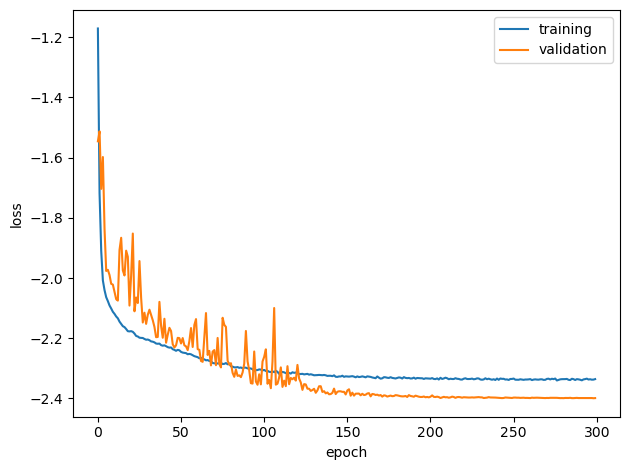

In [12]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(model_snrv.training_losses)), model_snrv.training_losses)
ax.plot(np.arange(len(model_snrv.validation_losses)), model_snrv.validation_losses)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(['training','validation'])
fig.tight_layout()

In [13]:
save_freq = 100 # ps

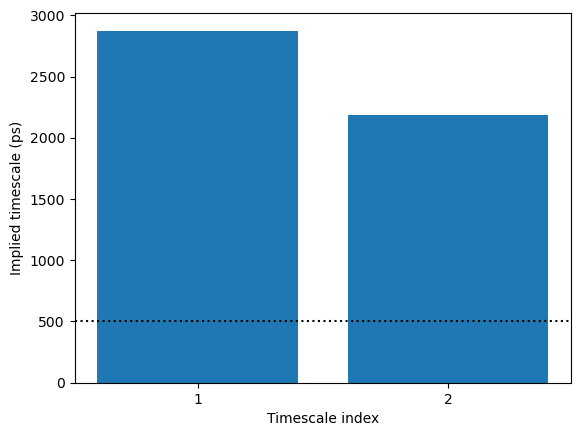

In [14]:
evals = model_snrv.evals.cpu().detach().numpy()
plt.bar(range(1,evals.size), -lag_n*save_freq/np.log(evals[1:]))
plt.ylabel('Implied timescale (ps)')
plt.xticks(range(1,evals.size))
plt.xlabel('Timescale index')
plt.axhline(lag_n*save_freq, color='k', linestyle=':')

In [15]:
model_snrv.eval()

Snrv(
  (activation): GELU(approximate=none)
  (model): Sequential(
    (0): Linear(in_features=10, out_features=100, bias=True)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): GELU(approximate=none)
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): GELU(approximate=none)
    (6): Linear(in_features=100, out_features=3, bias=True)
  )
)

In [16]:
evecs = model_snrv.transform(torch.cat(coords_torch)).cpu().detach().numpy()

In [17]:
import deeptime as dt
tica = dt.decomposition.TICA(lagtime = 5, dim=2)
TICs = tica.fit_transform([a.numpy() for a in coords_torch]).reshape(-1, 2)

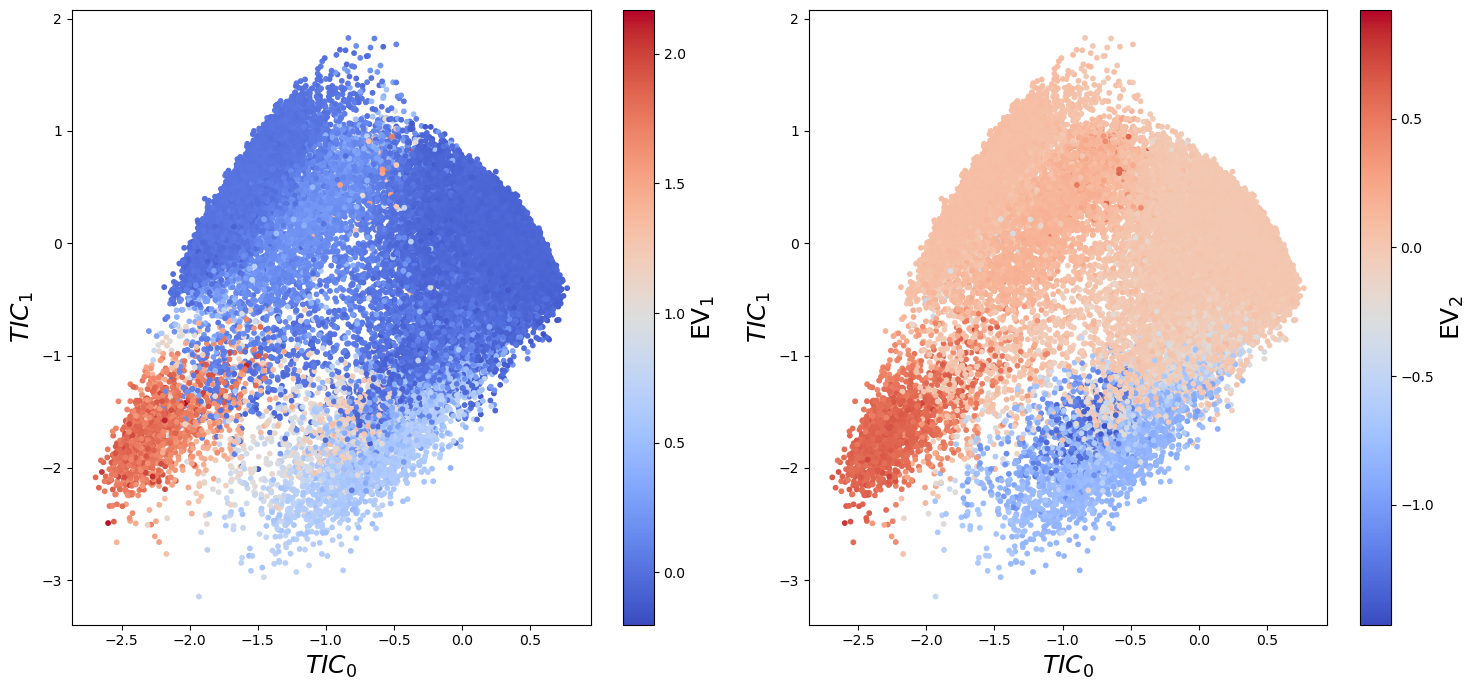

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (15, 7))
axes = axes.flatten()

for e in range(1, evecs.shape[1]):
    evec = evecs[:, e]
    ax = axes[e-1]
    
    im = ax.scatter(TICs[:,0], TICs[:,1], c=evec, s=10, cmap='coolwarm')
    ax.set_xlabel('$TIC_0$', fontsize=18)
    ax.set_ylabel('$TIC_1$', fontsize=18)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(f'EV$_{e}$', size=18)

plt.tight_layout()

In [19]:
CVs = [model_snrv.transform(x).cpu().detach()[:, 1:] for x in coords_torch]
CVs[0].shape, len(CVs)

(torch.Size([5001, 2]), 25)

# MDN propagator

In [20]:
model_mdn = Propagator(dim = CVs[0].size(1))

In [21]:
model_mdn.fit(CVs, lag = 10, max_epochs=25)

/project/andrewferguson/Kirill/env_lss/lib/python3.8/site-packages/lightning_lite/plugins/environments/slurm.py:167: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /project/andrewferguson/Kirill/env_lss/lib/python3.8 ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type                  | Params
--------------------------------------------------
0 | mdn     | MixtureDensityNetwork | 33.0 K
1 | _scaler | MinMaxScaler          | 0     
--------------------------------------------------
33.0 K    Trainable params
0         Non-trainable params
33.0 K    Total params
0.132     Total estimated model params size (MB)
/project/andrewferguson/Kirill/env_lss/lib/pyt

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=25` reached.


Propagator(
  (mdn): MixtureDensityNetwork(
    (network): MLP(
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=128, bias=True)
        (1): SiLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): SiLU()
        (4): Linear(in_features=128, out_features=125, bias=True)
      )
    )
  )
  (_scaler): MinMaxScaler()
)

In [22]:
n_steps = int(1E4)
x = CVs[0][0][None]
synthetic_traj_CVs = model_mdn.gen_synthetic_traj(x, n_steps)

  0%|          | 0/10000 [00:00<?, ?it/s]

# DDPM Decoder

In [23]:
xyz = list()
for trj in trjs:
    
    t_backbone = trj.atom_slice(trj.top.select('backbone')).center_coordinates()
    
    n = trj.xyz.shape[0]

    xyz.append(torch.tensor(t_backbone.xyz.reshape(n, -1)).float())

In [24]:
model_ddpm = DDPM(xyz[0].shape[1], CVs[0].shape[1])

In [25]:
model_ddpm.fit(xyz, CVs, max_epochs=25)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type              | Params
--------------------------------------------------------
0 | model             | GaussianDiffusion | 4.0 M 
1 | ema_model         | GaussianDiffusion | 4.0 M 
2 | _feature_scaler   | MinMaxScaler      | 0     
3 | _condition_scaler | MinMaxScaler      | 0     
--------------------------------------------------------
7.9 M     Trainable params
0         Non-trainable params
7.9 M     Total params
31.749    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=25` reached.


DDPM(
  (model): GaussianDiffusion(
    (denoise_fn): Unet1D(
      (init_conv): Conv1d(1, 32, kernel_size=(7,), stride=(1,), padding=(3,))
      (time_mlp): Sequential(
        (0): SinusoidalPosEmb()
        (1): Linear(in_features=32, out_features=128, bias=True)
        (2): GELU(approximate=none)
        (3): Linear(in_features=128, out_features=128, bias=True)
      )
      (downs): ModuleList(
        (0): ModuleList(
          (0): ResnetBlock(
            (mlp): Sequential(
              (0): SiLU()
              (1): Linear(in_features=128, out_features=64, bias=True)
            )
            (block1): Block(
              (proj): WeightStandardizedConv2d(32, 32, kernel_size=(3,), stride=(1,), padding=(1,))
              (norm): GroupNorm(8, 32, eps=1e-05, affine=True)
              (act): SiLU()
            )
            (block2): Block(
              (proj): WeightStandardizedConv2d(32, 32, kernel_size=(3,), stride=(1,), padding=(1,))
              (norm): GroupNorm(8, 32,

# Decode synthetic traj

In [26]:
xyz_gen = model_ddpm.generate(synthetic_traj_CVs)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [27]:
xyz_gen = xyz_gen.reshape(xyz_gen.size(0), -1 , 3).numpy()
fake_trj = md.Trajectory(xyz = xyz_gen, topology=t_backbone.top)

# Visualize results

In [28]:
import nglview as nv

In [33]:
v = nv.show_mdtraj(fake_trj)
v.clear_representations()
v.add_representation('ball+stick')
v

NGLWidget(max_frame=9999)

In [34]:
fake_trj.save_pdb('WLALL_backbone_synthetic_traj.pdb')